In [24]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbs
from scipy.constants import pi
os.sys.path.append('/home/vgubaidulin/PhD/Code/Numerical/Stability_diagrams/')
sbs.set(rc={'figure.figsize': (2*8.3, 2*5.2),
            'text.usetex': True,
            'font.family': 'serif',
            'font.size': 20,
            'axes.linewidth': 2,
            'lines.linewidth': 3,
            'legend.fontsize': 16,
            'legend.numpoints': 1, },
        style='ticks',
        palette='colorblind',
        context='talk')
from Schenk import *
from SIS100_H_functions import *

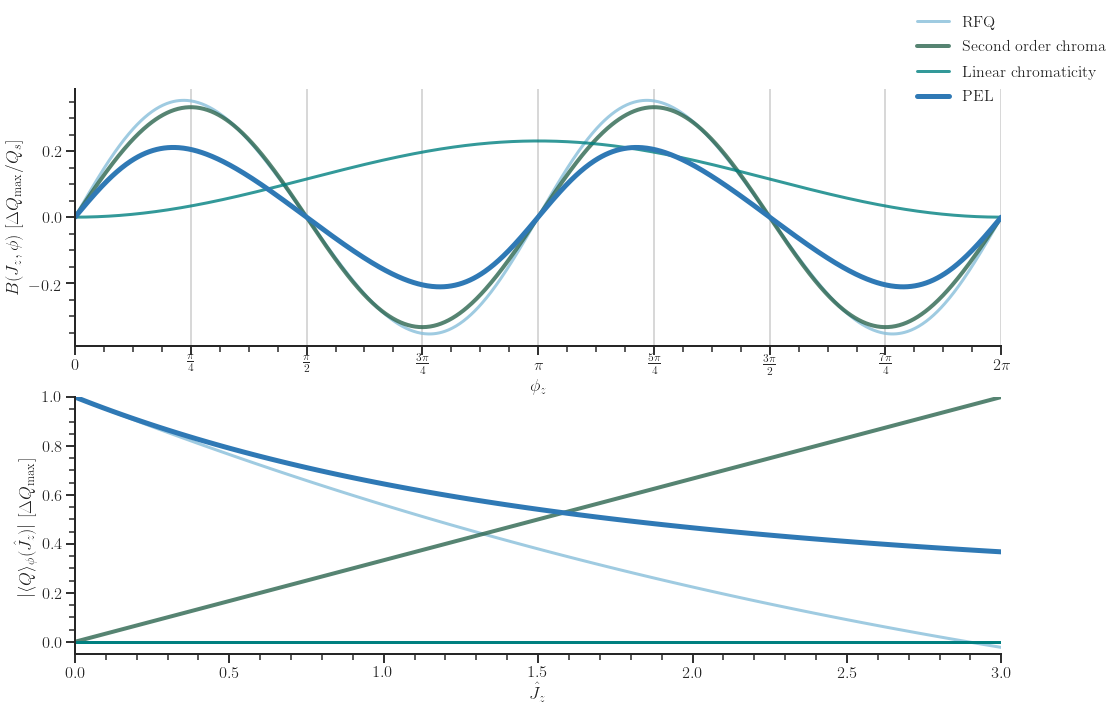

In [25]:
palette = sbs.color_palette('RdBu')
phi = np.linspace(0, 2*pi, 1000)
Jz = np.linspace(0, 3, 100)

fig, (ax, ax2) = plt.subplots(2, 1)
dQmax=1e-3
ax.plot(phi, B(B_integrand_RFQ, Jz=2, phi=phi) /
        dQmax,  label='RFQ', color=palette[-2], alpha=0.8)
ax2.plot(Jz, Q_average_detuning_RFQ(Jz) /
        dQmax, color=palette[-2], alpha=0.8)

ax.plot(phi, -B(B_integrand_Qpp, Jz=2, phi=phi) /
        dQmax,  label='Second order chroma', color='#2C664F', alpha=0.8, linewidth=4)
ax2.plot(Jz, np.abs(Q_average_detuning_Qpp(Jz)) /
        dQmax, color='#2C664F', alpha=0.8, linewidth=4)

ax.plot(phi, .1*B(B_integrand_Qp, Jz=2., phi=phi) /
        dQmax,  label='Linear chromaticity', color='#008080', alpha=0.8)
ax2.axhline(0, color='#008080')

ax.plot(phi, B(B_integrand, Jz=2, phi=phi) /
        dQmax,  label='PEL', color=palette[-1], linewidth=5)
ax2.plot(Jz, Q_average_detuning(Jz) /
        dQmax, color=palette[-1], linewidth=5)

ax.set_xlabel('$\phi_z$')
ax.set_ylabel(
    '$B(J_z, \phi)$ [$\Delta Q_\mathrm{max}/Q_s$]')
ax2.set_xlabel('$\hat{J_z}$')
ax2.set_ylabel(
    '$| \langle Q \\rangle_\phi (\hat{J_z})|$ [$\Delta Q_\mathrm{max}$]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax.set_xlim(0, 2*pi)
ax2.set_xlim(0, 3)
ax2.set_ylim(-0.05, 1)
ticks = np.linspace(0, 2*pi, 9)
ax.set_xticks(ticks)
ax.minorticks_on()
ax2.minorticks_on()

ax.set_xticklabels(
    ['$0$',
     '$\\frac{\pi}{4}$',
     '$\\frac{\pi}{2}$',
     '$\\frac{3\pi}{4}$',
     '$\pi$',
     '$\\frac{5\pi}{4}$',
     '$\\frac{3\pi}{2}$',
     '$\\frac{7\pi}{4}$',
     '$2\pi$'],)
ax.xaxis.grid()
plt.figlegend(frameon=False)
plt.savefig('/home/vgubaidulin/PhD/Code/Numerical/Stability_diagrams/Results/'+'B.pdf', bbox_inches='tight')
plt.show()

In [ ]:
%%time
print('beta_z: ', BETA_Z)
print('sigma_z: ', SIGMA_Z)
print('Order of magnitude for longitudinal amplitude: ',
      SIGMA_Z/(BETA*c)*OMEGA_REV)
sbs.set_palette('colorblind')
time_start = time.process_time()
p = 0
l = 1
Jz = np.linspace(0, 3, 20)
Jz *= SIGMA_Z**2/(2*BETA_Z)
Hr, Hi = H(Jz, p=p, l=l)
plt.plot(Jz/(SIGMA_Z**2/(2*BETA_Z)), np.sqrt(Hr**2+Hi**2), c='b',
         linewidth=2, marker='o', markersize=2, label='$|H^0_l(J_z)|$')
omega_0 = c/CIRCUMFERENCE
Q_X = 18.86
omega_p = OMEGA_REV*(p+Q_X+l*Q_S)
Jz = np.linspace(0, 3, 200)
Jz *= SIGMA_Z**2/(2*BETA_Z)
plt.plot(Jz/(SIGMA_Z**2/(2*BETA_Z)),
         (jv(l, np.sqrt(2*Jz*BETA_Z)/c*(omega_p)))**2,
         c='r',
         linewidth=3,
         markersize=1,
         label='$|J_l(J_z)|^2$')
plt.xlabel('$J_z/\epsilon_z$')
plt.ylabel('Spectral function')
plt.legend(frameon=False)

beta_z:  25849.753589269152
sigma_z:  14.5
Order of magnitude for longitudinal amplitude:  0.08407732277049096


/home/vgubaidulin/PhD/Code/Numerical/Stability_diagrams/Schenk.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return dQmax*np.exp(-0.5*Jz)*i0(0.5*Jz)
/home/vgubaidulin/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/home/vgubaidulin/PhD/Code/Numerical/Stability_diagrams/Schenk.py:67: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(func, 0, phi, args=(Jz,))[0]
/home/vgubaidulin/PhD/Code/Numerical/Stability_diagrams/Schenk.py:87: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return 1./(2*np.pi)*quad(real_func, 0, 2*pi)[0], 1./(2*np.pi)*quad(imag_func, 0, 2*pi)[0]
